In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

#Define the rebound simulation
sim1 = rebound.Simulation()

#Define the masses and mass ratios of the system
m1 = 3*10**-6
m2 = 3.69*10**-8
m3 = 1
m = m1 + m2
M = m + m3
eta = m1*m2/m**2
eta3 = m*m3/M**2

#Define the initial orbit elements of the inner binary
inner_a = 0.00257
inner_e = 0.0554
inner_w = 288.5*np.pi/180
inner_Omega = 0
inner_f = 90

#Define the initial orbit elements of the outer binary
outer_A = 1
outer_E = 0.0167
outer_w3 = 85.9*np.pi/180
outer_Omega3 = np.pi
outer_f = 90

#Define the initial relative inclination
z = 5.16*np.pi/180 

#Calculate the angular momenta of the inner and outer binary
Jb = m*eta*(m*inner_a*(1-inner_e**2))**0.5
J3 = M*eta3*(M*outer_A*(1-outer_E**2))**0.5
beta = Jb/J3
#Determine the initial inclinations of the inner and outer binary to align J with z
outer_i3 = np.arctan(((beta**-1 + np.cos(z))/np.sin(z))**-1)
inner_i =  np.arctan(((beta + np.cos(z))/np.sin(z))**-1) 

#Define the rebound simulation by adding the three masses with corresponding orbit elements
sim1.add(m=m1)                
sim1.add(m=m2, a=inner_a, e=inner_e, inc=inner_i,  omega=inner_w,
         Omega=inner_Omega,f = inner_f*np.pi/180)
sim1.add(m=m3, a=outer_A, e=outer_E, inc=outer_i3, omega=outer_w3,
         Omega=outer_Omega3,f = outer_f*np.pi/180)
sim1.move_to_com()

#Print important quantities as a check
Pratio = sim1.particles[2].P/sim1.particles[1].P
print("relative inclination = ",(inner_i+outer_i3)*180/np.pi)
print("P_2/P_1 = ",Pratio)
print("sin(i3)/sin(i) - beta = ",np.sin(outer_i3)/np.sin(inner_i)-beta)


#Define the period of the inner orbit in rebound's system of units
innerP = sim1.particles[1].P

#Set the integration time,
tf = 500*sim1.particles[1].P

#Define empty lists for the data to fill
efcn1,zfcn1,afcn1,tlist,Efcn1,Afcn1,wfcn1 = [],[],[],[],[],[],[]

#Integration loop
while sim1.t < tf:
    #Append the current the values of orbit elemenths to the corresponding list
    afcn1.append(sim1.particles[1].a)
    Afcn1.append(sim1.particles[2].a)
    zfcn1.append(sim1.particles[1].inc + sim1.particles[2].inc)
    efcn1.append(sim1.particles[1].e)
    Efcn1.append(sim1.particles[2].e)
    wfcn1.append(sim1.particles[1].omega)
    tlist.append(sim1.t)   
    #Integrate the system forward by x steps
    sim1.steps(1)
    
#Scatter plot the a and t data
plt.scatter(np.array(tlist)/innerP,afcn1,s=0.001)
plt.title("Number of points = {} * 10^6".format(len(tlist)/10**6))
plt.xlabel('t / inner period')
plt.ylabel('a [au]')
plt.show()


print("number of integration steps = ",sim1.steps_done)
print("end simulation time in innerP's = ",sim1.t/innerP)

relative inclination =  5.160000000000001
P_2/P_1 =  13.375650161790693
sin(i3)/sin(i) - beta =  -2.117582368135751e-22


<Figure size 640x480 with 1 Axes>

number of integration steps =  10741
end simulation time in innerP's =  500.0031612430592


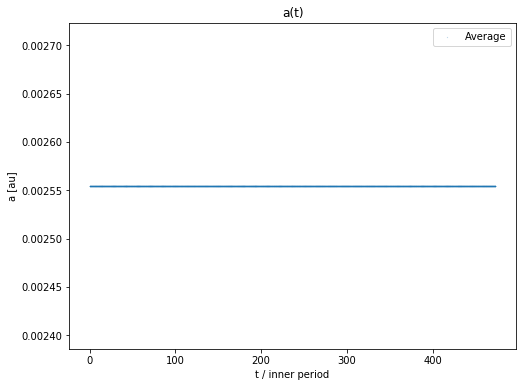

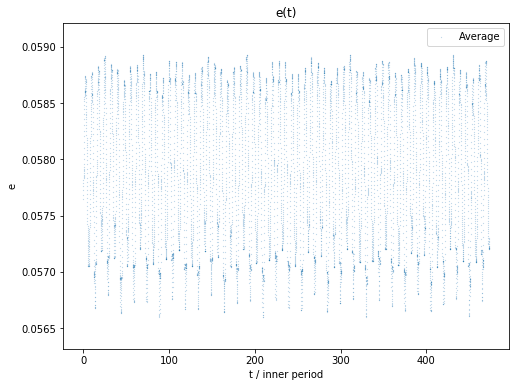

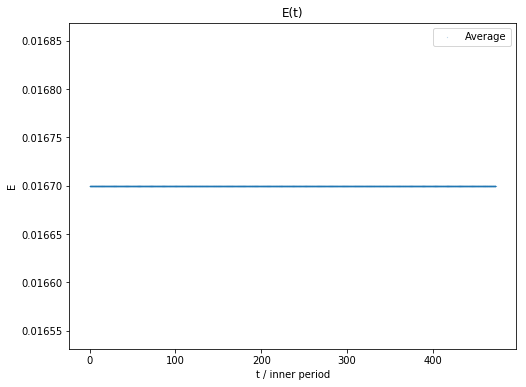

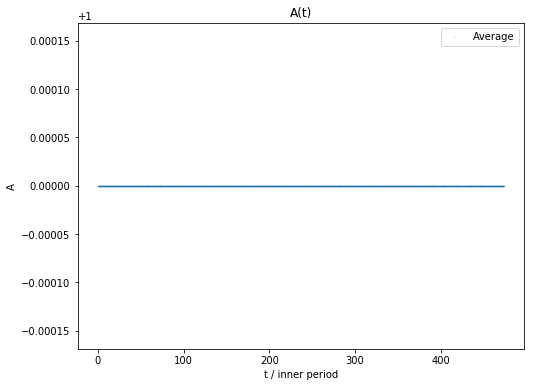

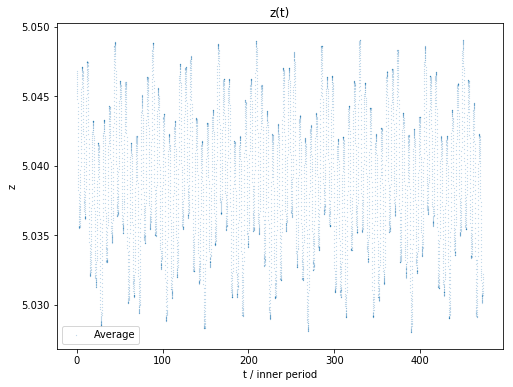

In [2]:
N = 2*int(len(afcn1)/((tlist[-1])/innerP/Pratio))
tlist=np.array(tlist)
aved_a = np.convolve(afcn1,np.ones(N)/N,mode='valid')
plt.figure(figsize=(8, 6))
#plt.scatter(np.array(tlist)/innerP,afcn1,label="Exact",s=0.01)
plt.scatter(tlist[:len(aved_a)]/innerP,aved_a,label="Average",s=0.01)
plt.title("a(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('a [au]')
plt.show()

aved_e = np.convolve(efcn1,np.ones(N)/N,mode='valid')
plt.figure(figsize=(8, 6))
#plt.scatter(np.array(tlist)/innerP,efcn1,label="Exact",s=0.01)
plt.scatter(tlist[:len(aved_e)]/innerP,aved_e,label="Average",s=0.01)
plt.title("e(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('e')
plt.show()

aved_E = np.convolve(Efcn1,np.ones(N)/N,mode='valid')
plt.figure(figsize=(8, 6))
#plt.scatter(np.array(tlist)/innerP,efcn1,label="Exact",s=0.01)
plt.scatter(tlist[:len(aved_E)]/innerP,aved_E,label="Average",s=0.01)
plt.title("E(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('E')
plt.show()

aved_A = np.convolve(Afcn1,np.ones(N)/N,mode='valid')
plt.figure(figsize=(8, 6))
#plt.scatter(np.array(tlist)/innerP,efcn1,label="Exact",s=0.01)
plt.scatter(tlist[:len(aved_A)]/innerP,aved_A,label="Average",s=0.01)
plt.title("A(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('A')
plt.show()

zfcn1 = 180/np.pi*np.array(zfcn1)
aved_z = np.convolve(zfcn1,np.ones(N)/N,mode='valid')
plt.figure(figsize=(8, 6))
#plt.scatter(np.array(tlist)/innerP,zfcn1,label="Exact",s=0.01)
plt.scatter(tlist[:len(aved_z)]/innerP,aved_z,label="Average",s=0.01)
plt.title("z(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('z')
plt.show()

aved_w = np.convolve(wfcn1,np.ones(N)/N,mode='valid')

In [7]:
tlist=tlist/innerP
tlist.astype('float32').tofile('npt.dat')
aved_z.astype('float32').tofile('npavz.dat')
aved_w.astype('float32').tofile('npavw.dat')

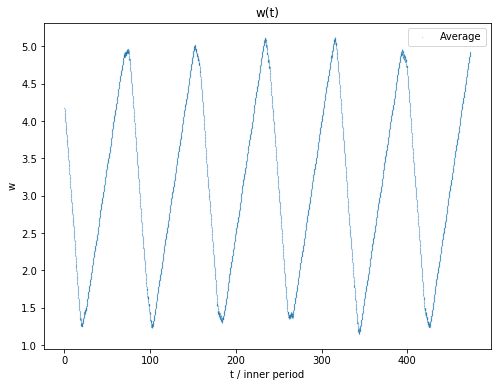

In [3]:

plt.figure(figsize=(8, 6))
#plt.scatter(np.array(tlist)/innerP,zfcn1,label="Exact",s=0.01)
plt.scatter(tlist[:len(aved_w)]/innerP,aved_w,label="Average",s=0.01)
plt.title("w(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('w')
plt.show()

In [24]:
from scipy.signal import find_peaks
find_peaks(aved_w,height=4.9)

(array([1506, 1533, 1560, 1585, 1608, 3252, 3276, 3300, 3328, 5018, 5038,
        5060, 5084, 6712, 6762, 6784, 6807, 6828, 8452, 8476], dtype=int64),
 {'peak_heights': array([4.92680117, 4.92755974, 4.94675502, 4.97018505, 4.95181665,
         5.00603398, 5.02375704, 4.97106384, 4.90537602, 5.11888693,
         5.09499642, 5.0213929 , 4.9140908 , 4.94319954, 5.09782157,
         5.11989442, 5.05294637, 4.91512598, 4.96052831, 4.94026923])})

In [25]:
aved_w[1585]

4.94675501968638

In [20]:
aved_w[3252]

5.006033978470948

In [26]:
(-tlist[1484]+tlist[3252])/innerP

82.17243338975058

In [28]:
(-tlist[5018]+tlist[6784])/innerP

82.01286210452542